In [129]:
# Rossmann Store Sales https://www.kaggle.com/c/rossmann-store-sales/overview

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('../data/train.csv', parse_dates=['Date']) 
# due to parse_dates 'Date' col will be of datetime type (otherwise object type)
test = pd.read_csv('../data/test.csv', parse_dates=['Date']) 
store = pd.read_csv('../data/store.csv')

### 1. Data preprocessing

### Train and test
- Id - an Id that represents a (Store, Date) duple within the test set.<br>
- Store - a unique Id for each store.<br>
- DayOfWeek - from 1 to 7
- Date
- Sales: the turnover for any given day (target variable).<br>
- Customers: the number of customers on a given day.<br>
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.<br>
- Promo: indicates whether a store is running a promo on that day: 0 = no, 1 = yes.<br>
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. a = public holiday, b = Easter holiday, c = Christmas, 0 = None<br>
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools. All schools are closed on public holidays and weekends: 0 = no, 1 = yes.

In [4]:
print('Train shape', train.shape)
print('Test shape', test.shape)

Train shape (1017209, 9)
Test shape (41088, 8)


In [5]:
train.head().append(train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [136]:
test.head().append(test.tail())

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


Train and test contain data for 1115 stores. Train covers the period 01.01.2013-31.07.2015, and test - 01.08-17.09.2015. 

In [138]:
for df in [train, test]:
    df['StateHoliday'] = df['StateHoliday'].astype(str)

#### Observation with Open = 0,  Sales = 0 

In [139]:
len(test[test['Open'] == 0])

5984

In [140]:
len(train[(train['Open'] == 0) & (train['Sales'] != 0)])

0

In [141]:
len(train[train['Open'] == 0])

172817

In [142]:
len(train[(train['Open'] != 0) & (train['Sales'] == 0)])

54

According to the task description at kaggle site, observations with Open=0 will be ignored in scoring. So, it's reasonable to exclude observations with Open=0 from train.
There are also few observation in train with Sales=0. Let's also exclude them.

In [143]:
train = train[train['Sales'] != 0]

In [144]:
print('Train shape', train.shape)

Train shape (844338, 9)


#### Missing values imputation

In [145]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [146]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [147]:
test[test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [211]:
test[test['Store'] == 622]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,1.0,1,0,0
1335,1336,622,3,2015-09-16,1.0,1,0,0
2191,2192,622,2,2015-09-15,1.0,1,0,0
3047,3048,622,1,2015-09-14,1.0,1,0,0
3903,3904,622,7,2015-09-13,0.0,0,0,0
4759,4760,622,6,2015-09-12,1.0,0,0,0
5615,5616,622,5,2015-09-11,1.0,0,0,0
6471,6472,622,4,2015-09-10,1.0,0,0,0
7327,7328,622,3,2015-09-09,1.0,0,0,0
8183,8184,622,2,2015-09-08,1.0,0,0,0


NaN in test['Open'] corresponds to store 622, which closed on Sundays. NaNs corresponds to Monday-Saturday, so let's impute them with ones.

In [149]:
test['Open'].fillna(1, inplace = True)

### Store

- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [150]:
print('Store share', store.shape)

Store share (1115, 10)


In [151]:
store.head().append(store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [152]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Missing values imputation

In [153]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Consider 3 Competition variables

In [154]:
store[store['CompetitionDistance'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


There is no information on Competition distance for 3 stores, but all the rest ones have competitors nearby. 
For simplicity at the EDA stage let's impute missing values in CompetitionDistance, CompetitionOpenSinceMonth and CompetitionOpenSinceYear with zeros. Other approaches for imputation for these 3 variables can be considered later at the modeling stage. 

In [155]:
for col in ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionDistance']:
    store[col].fillna(0, inplace=True)

Consider 3 Promo variables

In [156]:
store[store['Promo2SinceWeek'].isnull() | store['Promo2SinceYear'].isnull() | store['PromoInterval'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,0.0,0.0,0,NaN,NaN,NaN


In [157]:
store.groupby('Promo2').size()

Promo2
0    544
1    571
dtype: int64

In [158]:
sum(store[store['Promo2SinceWeek'].isnull() | store['Promo2SinceYear'].isnull() | store['PromoInterval'].isnull()]['Promo2'] != 0)

0

When Promo2 = 0, 3 other Promo variables equal to NaN. Let us impute them with 0.

In [159]:
for col in ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
    store[col].fillna(0, inplace=True)

In [160]:
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'Promo2SinceWeek']:
    store[col] = store[col].astype(int)

### Merge train and test with store

In [161]:
train_store = train.merge(store, on = 'Store')
test_store = test.merge(store, on = 'Store')

### Feature engineering

In [162]:
# Create Year, Month, Day, WeekOfYear from Date

for df in [train_store, test_store]:
    df['Year'] = df['Date'].dt.year.astype(int)
    df['Month'] = df['Date'].dt.month.astype(int)
    df['Day'] = df['Date'].dt.day.astype(int)
    df['WeekOfYear'] = df['Date'].dt.weekofyear.astype(int)

In [163]:
# Create CompetitionOpen and PromoOpen as duration in month since Competition/Promo2 is open

for df in [train_store, test_store]:
    df['CompetitionOpen'] = 12 * (df['Year'] - df['CompetitionOpenSinceYear']) + \
        (df['Month'] - df['CompetitionOpenSinceMonth'])
    df.loc[df['CompetitionOpenSinceYear'] == 0, 'CompetitionOpen'] = 0
    df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
    df['PromoOpen'] = 12 * (df['Year'] - df['Promo2SinceYear']) + \
        (df['WeekOfYear'] - df['Promo2SinceWeek']) / 4.0
    df.loc[df['Promo2SinceYear'] == 0, 'PromoOpen'] = 0
    df['PromoOpen'] = df['PromoOpen'].apply(lambda x: x if x > 0 else 0)

In [164]:
# Create IsPromoMonth as indicator if it's a promo time in the day/store

month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
for df in [train_store, test_store]:    
    df['monthStr'] = df['Month'].map(month2str)
    df.loc[df['PromoInterval'] == 0, 'PromoInterval'] = ''
    df['IsPromoMonth'] = 0
    df.loc[df.apply(lambda x: x['monthStr'] in x['PromoInterval'], axis = 1),'IsPromoMonth']=1

In [165]:
# There is a kaggle post to prove that log transform of target improves prediction if the metric is RMSPE
# https://www.kaggle.com/c/rossmann-store-sales/discussion/17026
y = np.log1p(train_store['Sales']) # log1p(x) = log(1 + x)

In [166]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        844338 non-null  float64 

### 2. EDA

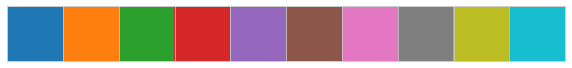

In [167]:
color = sns.color_palette()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.palplot(color)

#### Target variable Sales

In [168]:
train_store['Sales'].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [169]:
y.describe()

count    844338.000000
mean          8.757737
std           0.425201
min           3.850148
25%           8.488794
50%           8.759355
75%           9.031333
max          10.634701
Name: Sales, dtype: float64

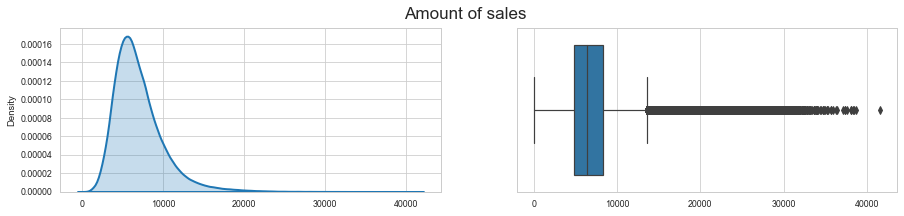

In [170]:
plt.figure(figsize=(15,3))
plt.suptitle("Amount of sales", fontsize=17)
gridspec.GridSpec(1,2)

plt.subplot2grid((1,2),(0,0))
sns.distplot(train_store['Sales'].values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})

plt.subplot2grid((1,2),(0,1))
sns.boxplot(train_store['Sales'].values);

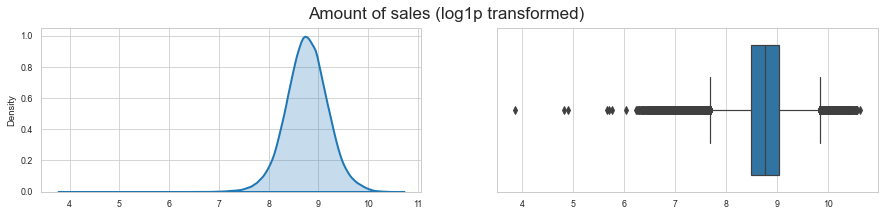

In [171]:
plt.figure(figsize=(15,3))
plt.suptitle("Amount of sales (log1p transformed)", fontsize=17)
gridspec.GridSpec(1,2)

plt.subplot2grid((1,2),(0,0))
sns.distplot(y.values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})

plt.subplot2grid((1,2),(0,1))
sns.boxplot(y.values);

#### Sales by month, day and day of week variation

In [172]:
def chart_sales(df, period):
    temp = df.groupby(['Year', period])['Sales'].sum()//(10**6)
    r = {}
    for y in [2013, 2014, 2015]:
        r[y] = len(temp[y]) + 1
    plt.figure(figsize=(15,4))
    j = 0
    for y in [2013, 2014, 2015]:
        i = r[y]
        plt.plot(range(1,i),temp.iloc[j:j+(i-1)],label=str(y), marker='o')
        j += i-1
    plt.ylabel('Sales, millions', fontsize=12)
    plt.xlabel(period, fontsize=12)
    plt.title('Sales by '+ period, fontsize=16)
    plt.xticks(np.arange(1, r[2013], 1.0))
    plt.xlim(1, r[2013]-1)
    plt.legend(loc='upper right', fontsize=11)
    plt.xticks(rotation='horizontal');

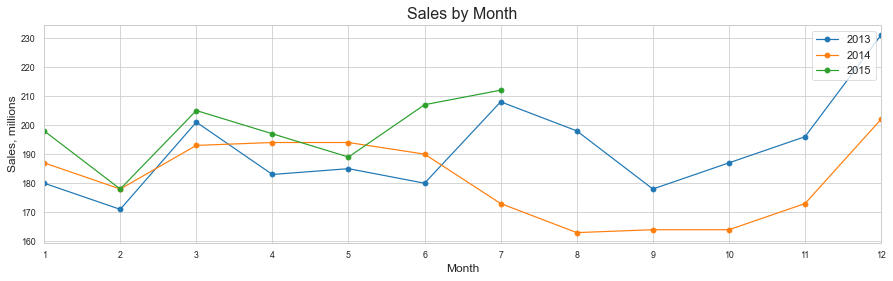

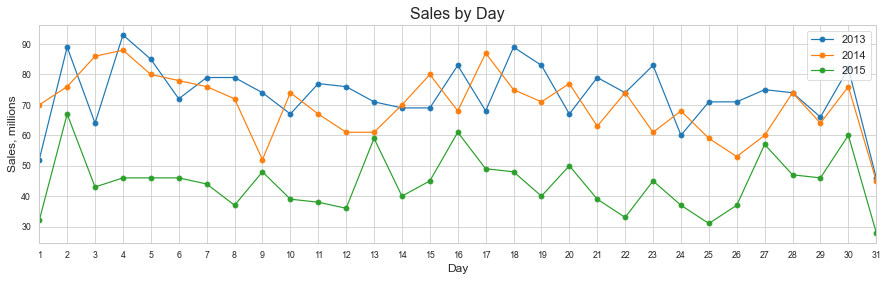

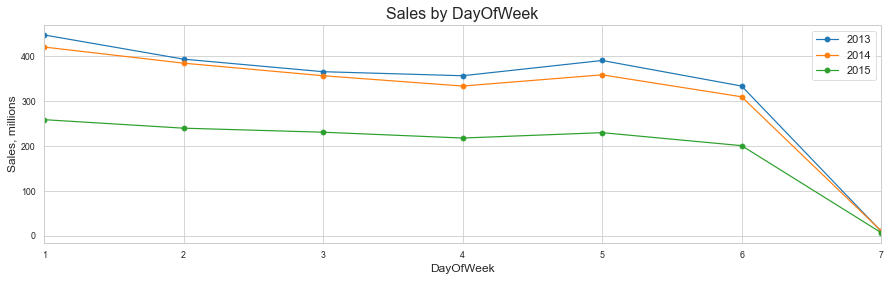

In [173]:
for period in ['Month', 'Day', 'DayOfWeek']:
    chart_sales(train_store, period)

There are patterns on the three above plots. We can expect to see variables 'Month', 'Day', 'DayOfWeek' among good predictors when modeling.

#### Variables about holidays: SchoolHoliday and StateHoliday
StateHoliday: a = public holiday, b = Easter holiday, c = Christmas, 0 = None<br>
SchoolHoliday: 0 = no, 1 = yes (indicates if the (Store, Date) was affected by the closure of public schools) 

SchoolHoliday effect

In [174]:
print(sum(train_store['SchoolHoliday'] > 0)/len(train_store))
print(sum(test_store['SchoolHoliday'] > 0)/len(test_store))

0.19357769045098053
0.4434871495327103


About 19% and 44% of records are for (Store, Date) affected by the closure of public schools
in the train and test datasets respectively 

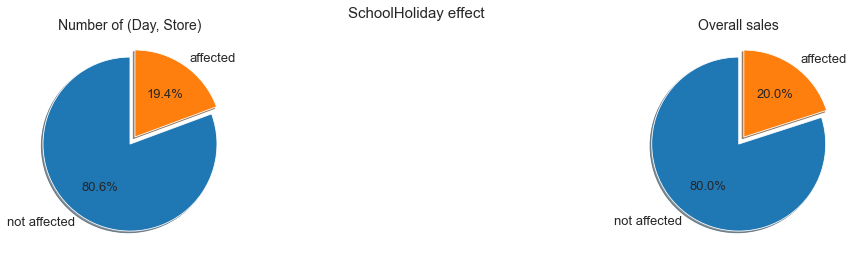

In [175]:
# Visualize share of records for (Store, Date) affected/not affected by the closure of public schools
# and share of sales for (Store, Date) affected/not affected by the closure of public schools

plt.figure(figsize=(20,4))
plt.suptitle("SchoolHoliday effect",fontsize=15)

plt.subplot(121)
temp = train_store['SchoolHoliday'].value_counts().sort_index()
ax1 = plt.pie(temp, explode=(0,0.1), labels=['not affected', 'affected'], autopct='%1.1f%%', textprops={'fontsize': 13},
        shadow=True, startangle=90); 
plt.title('Number of (Day, Store)', fontsize=14)
plt.grid(False)

plt.subplot(122)
temp = train_store.groupby(['SchoolHoliday'])['Sales'].sum()//(10**6)
ax2 = plt.pie(temp, explode=(0,0.1), labels=['not affected', 'affected'], autopct='%1.1f%%', textprops={'fontsize': 13},
        shadow=True, startangle=90)
plt.title('Overall sales', fontsize=14)
plt.grid(False);

As we can see from the figure, the share of records for (Store, Date) affected by the closure of public schools, is proportional to the share of sales for these (Store, Date). It means SchoolHoliday variable has no significant effect on Sales.

StateHoliday effect

In [176]:
print(sum(train_store['StateHoliday'] != '0')/len(train_store))
print(sum(test_store['StateHoliday'] != '0')/len(test_store))

0.0010777674343687006
0.004380841121495327


Share of observation on state holiday days in the train dataset ~ 0.1% and in the test ~ 0.4%

In [177]:
train_store.groupby(['StateHoliday'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StateHoliday,,,,,,,,
0,843428.0,6953.960229,3098.470115,46.0,4859.0,6368.0,8358.0,41551.0
a,694.0,8487.471182,5708.626230,1010.0,4698.5,7556.0,10591.0,38484.0
b,145.0,9887.889655,7551.782095,960.0,4001.0,8423.0,13619.0,38722.0
c,71.0,9743.746479,5980.858729,1800.0,5647.5,8397.0,12430.0,32169.0


Median sales on state holiday days are higher than on non holiday days.

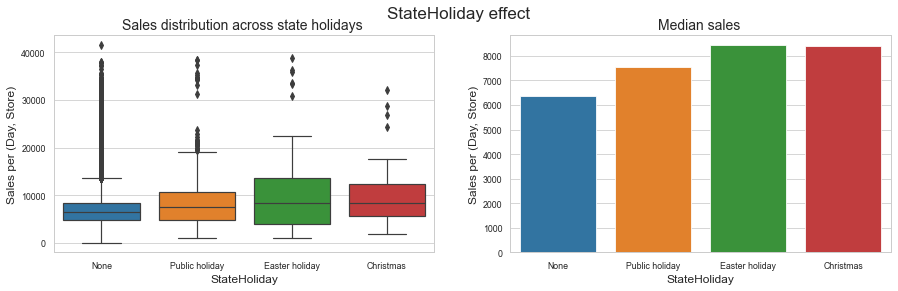

In [178]:
# Visualize sales distribution and median sales for each state holiday category 
plt.figure(figsize=(15,4))
plt.suptitle("StateHoliday effect",fontsize=17)

plt.subplot(121)
ax1 = sns.boxplot(y='Sales',x='StateHoliday', data=train_store)
plt.ylabel('Sales per (Day, Store)', fontsize=12)
plt.xlabel('StateHoliday', fontsize=12)
plt.title('Sales distribution across state holidays ', fontsize=14)
plt.xticks(np.arange(4), ['None', 'Public holiday', 'Easter holiday', 'Christmas'])

plt.subplot(122)
temp = train_store.groupby(['StateHoliday'])['Sales'].median()
ax2 = sns.barplot(temp.index, temp.values)
plt.ylabel('Sales per (Day, Store)', fontsize=12)
plt.xlabel('StateHoliday', fontsize=12)
plt.title('Median sales ', fontsize=14)
plt.xticks(np.arange(4), ['None', 'Public holiday', 'Easter holiday', 'Christmas']);

We can conclude that the variable StateHoliday effects on Sales.

#### Variables StoreTypes and Assortment
StoreType: differentiates between 4 different store models a, b, c, d<br>
Assortment: describes an assortment level a = basic, b = extra, c = extended

StoreType effect

In [179]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


Stores of type a, c and d generate similar median sales per day, stores of type b show 30% higher median sales per day. 

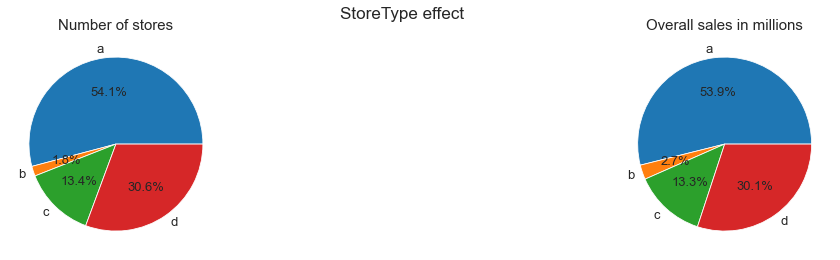

In [180]:
# Visualize shares of the number of stores of 4 types and shares of overall sales by stores of 4 types
plt.figure(figsize=(20,4))
plt.suptitle("StoreType effect",fontsize=17)

plt.subplot(121)
temp = train_store['StoreType'].value_counts().sort_index()
ax1 = plt.pie(temp, labels = ['a', 'b', 'c', 'd'], autopct='%1.1f%%', textprops={'fontsize': 13})
plt.title('Number of stores', fontsize=15)

plt.subplot(122)
temp=train_store.groupby('StoreType')['Sales'].sum()//(10**6)
ax2 = plt.pie(temp, labels = ['a', 'b', 'c', 'd'], autopct='%1.1f%%', textprops={'fontsize': 13})
plt.title('Overall sales in millions', fontsize=15);

Shares of stores of type a, c and d are similar to shares of overall sales by these store types. Share of sales of type b stores 30% more than share of this store types, but share of type b stores is small (1,8%).

Assortment effect

In [181]:
train_store.groupby(['Assortment'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Assortment,,,,,,,,
a,444875.0,6621.523057,2972.050174,46.0,4611.0,6082.0,8000.0,38722.0
b,8209.0,8642.503594,3803.116031,1580.0,5606.0,8088.0,11271.0,22137.0
c,391254.0,7300.843547,3183.849717,133.0,5156.0,6675.0,8703.0,41551.0


Stores are divided by assortment to three groups: 'a', 'b' and 'c'. Number of stores of type 'b' is about 1% of the total number of stores. Number of stores of type 'a' and 'c' is 53% and 46% respectivly.
Median of daily sales in stores of type 'c' in comparison with type 'a' is 9% higher. Type 'b' stores generates about 20% higher median sales than 'a' and 17% higher median sales than 'c'.

#### Variables about competition
There are 3 variables about competition in the store dataset: CompetitionDistance, CompetitionOpenSinceMonth and CompetitionOpenSinceYear. Instead the last two, let's consider a feature CompetitionOpen, that is duration in month since competition was open up to date of the observation in train/test dataset. 

CompetitionDistance effect

In [182]:
store['CompetitionDistance'].describe()

count     1115.000000
mean      5390.358744
std       7657.973705
min          0.000000
25%        710.000000
50%       2320.000000
75%       6875.000000
max      75860.000000
Name: CompetitionDistance, dtype: float64

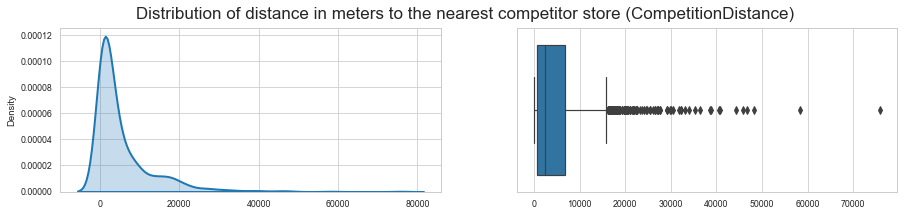

In [183]:
plt.figure(figsize=(15,3))
plt.suptitle("Distribution of distance in meters to the nearest competitor store (CompetitionDistance)", fontsize=17)
gridspec.GridSpec(1,2)

plt.subplot2grid((1,2),(0,0))
sns.distplot(store['CompetitionDistance'].values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})

plt.subplot2grid((1,2),(0,1))
sns.boxplot(store['CompetitionDistance'].values);

In [191]:
len(store[store['CompetitionDistance'] < 30000])/len(store)

0.9829596412556054

In [193]:
# For better visuality let's exclude ~2% of stores with high CompetitionDistance
tmp = train_store[train_store['CompetitionDistance'] < 30000].groupby(['CompetitionDistance'])['Sales'].median().reset_index(name='Sales')
tmp


,CompetitionDistance,Sales
0,0.0,4658.5
1,20.0,5451.0
2,30.0,5358.0
3,40.0,7112.0
4,50.0,8716.0
...,...,...
631,27530.0,5718.5
632,27650.0,2907.0
633,29070.0,8225.0
634,29190.0,6079.0


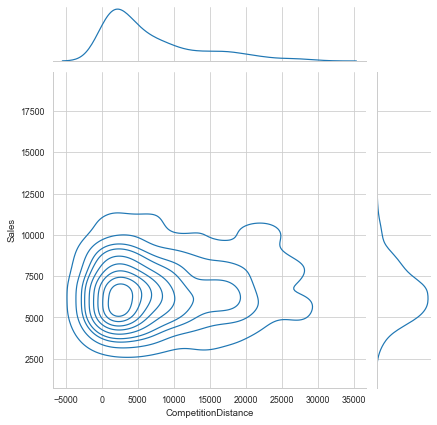

In [194]:
# Visualize bivariate distribution of CompetitionDistance and median (Day, Store) Sales 
sns.jointplot(x='CompetitionDistance', y='Sales', data=tmp, kind="kde");

Bivariate distribution of CompetitionDistance and median (Day, Store) Sales doesn't show any sufficient correlations between these two variables. 
Observations within 75% quartile of CompetitionDistance characterized by higher variance of sales. 

CompetitionOpen (diration of month since competition was open) effect

In [197]:
train_store['CompetitionOpen'].describe()

count    844338.000000
mean         41.953669
std          65.189972
min           0.000000
25%           0.000000
50%          16.000000
75%          73.000000
max        1386.000000
Name: CompetitionOpen, dtype: float64

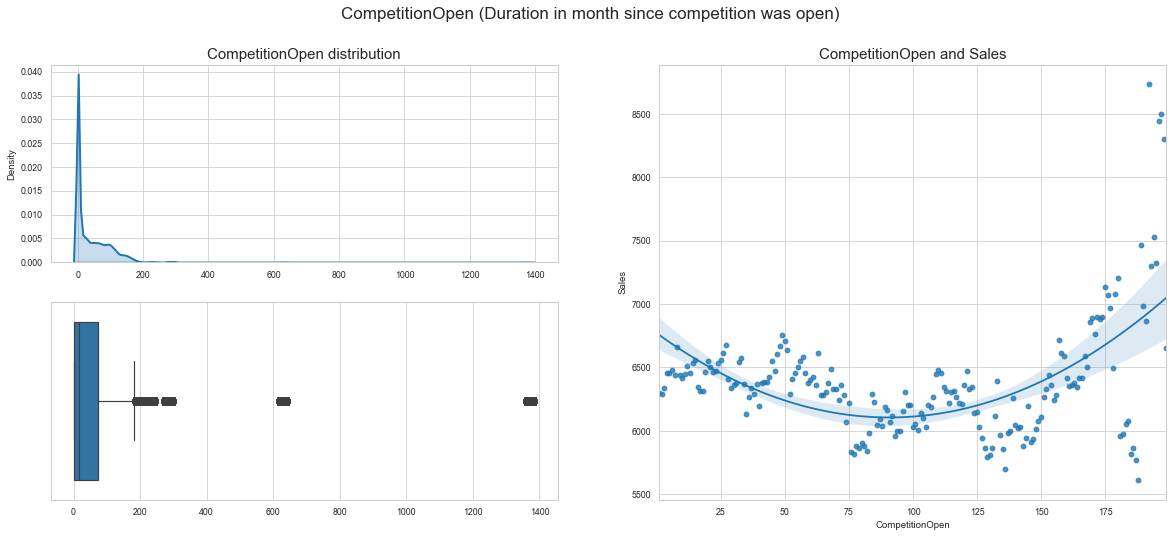

In [204]:
plt.figure(figsize=(20,8))
plt.suptitle("CompetitionOpen (Duration in month since competition was open)", fontsize=17)
gridspec.GridSpec(2,2)

plt.subplot2grid((2,2),(0,0))
sns.distplot(train_store['CompetitionOpen'].values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("CompetitionOpen distribution", fontsize=15)

plt.subplot2grid((2,2),(1,0))
sns.boxplot(train_store['CompetitionOpen'].values)

# For better visuality let's exclude a few observations with high values (>200) of CompetitionOpen (it's ~2% of records) 
tmp = train_store[(train_store['CompetitionOpen'] > 0) & (train_store['CompetitionOpen'] < 200)].groupby(['CompetitionOpen'])['Sales'].median()
tmp = tmp.reset_index(name='Sales')

plt.subplot2grid((2,2),(0,1), rowspan=2)
sns.regplot(x='CompetitionOpen', y='Sales', data=tmp, order=2)
plt.title("CompetitionOpen and Sales", fontsize=15);

We can expect influence of the duration since competition was open to daily sales. It's reasonable to include the feature CompetitionOpen into predictors set.

#### Variables about promotions
There are 5 variables that distinguish promotions: Promo (indicates whether a store is running a promo on that day) and 4 about a store participation in a continuing promotion (Promo2, Promo2SinceYear, Promo2SinceWeek and PromoInterval).

In the feature engineering section above there were created 2 features: PromoOpen (duration in month since a store has joined a continuing promotion up to date of the observation in train/test dataset) and IsPromoMonth (indicator if it's a promo time in the (Day, Store)). PromoOpen was constructed from  Promo2SinceYear and Promo2SinceWeek, IsPromoMonth - from PromoInterval.

Promo (indicates whether a store is running a promo on that day)

In [62]:
train_store.groupby(['Promo'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Promo,,,,,,,,
0,467463.0,5929.826183,2629.269229,46.0,4242.0,5459.0,7004.0,41551.0
1,376875.0,8228.739731,3175.253594,133.0,6070.0,7650.0,9686.0,38722.0


45% of observations in train_store correspond to (Day, Store) with a Promo. Median sales per (Day, Store) are 30% higher with promo.

Promo2 (indicates a store participation in a continuing promotion)

In [63]:
store['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [64]:
train_store.groupby(['Promo2'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Promo2,,,,,,,,
0,423292.0,7350.818414,3394.049065,46.0,5090.0,6685.0,8821.0,38722.0
1,421046.0,6558.993542,2724.593057,297.0,4667.0,6075.0,7912.0,41551.0


51% of stores participate in a  continuing promotion. A median sale per day for these stores is about 9% lower. 

PromoOpen (duration in month since a store has joined a continuing promotion up to date of the observation in train/test dataset)

In [65]:
print('Number of stores participating in a continuing promotion with available information about duration:', \
len(train_store[(train_store['Promo2'] == 1) & (train_store['PromoOpen'] == 0)].groupby(['Store'])))

Number of stores participating in a continuing promotion with available information about duration: 225


In [207]:
tmp = train_store[train_store['PromoOpen'] > 0]
tmp['PromoOpen'].describe()

count    362480.000000
mean         30.405378
std          17.633945
min           0.250000
25%          15.750000
50%          29.500000
75%          44.250000
max          72.000000
Name: PromoOpen, dtype: float64

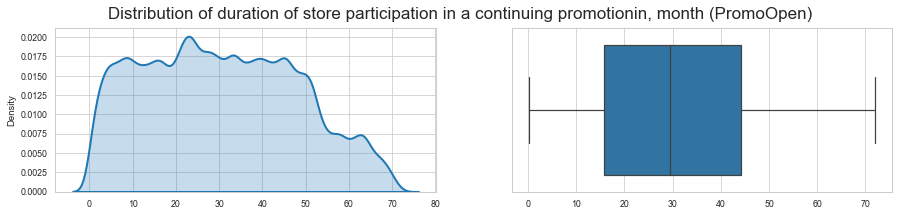

In [208]:
# Visualize PromoOpen distribution

plt.figure(figsize=(15,3))
plt.suptitle("Distribution of duration of store participation in a continuing promotionin, month (PromoOpen)", fontsize=17)
gridspec.GridSpec(1,2)

plt.subplot2grid((1,2),(0,0))
sns.distplot(tmp['PromoOpen'].values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})

plt.subplot2grid((1,2),(0,1))
sns.boxplot(tmp['PromoOpen'].values);

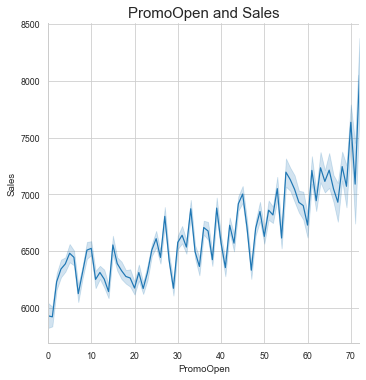

In [209]:
tmp['PromoOpen'] = tmp['PromoOpen'].round()
sns.relplot(x='PromoOpen', y='Sales', data=tmp, kind="line")
plt.title("PromoOpen and Sales", fontsize=15)
plt.xlim(0, 72);

225 stores (~20%), participating in a continuing promotion with available information about the duration, demonstrate positive influence of PromoOpen to (Day, Store) Sales. It's reasonable to include the feature PromoOpen into predictors set.

IsPromoMonth (indicator if it's a promo time in the (Day, Store)

In [149]:
train_store.groupby(['IsPromoMonth'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
IsPromoMonth,,,,,,,,
0,699125.0,7052.209581,3185.618445,46.0,4909.0,6440.0,8476.0,41551.0
1,145213.0,6492.563338,2626.283063,297.0,4650.0,6045.0,7838.0,31523.0


17% observations in train_store have a continuing promo in month of the (Day, Store). Median sales on these (Day, Store) are 9% less. It's reasonable to include the feature PromoOpen into predictors set.

### Conclusion

In the <b>Data preprocessing</b> part it was done the following.
<ol>
<li> Observations with Open=0 or Sales=0 were excluded from train.
<li> Missing values in test and store were imputed (there were not missing values in train).
<li> train and store, test and store were merged in train_store and test_store respectively.
<li> In total 8 features were created at the feature engineering stage: 
    <ul>
    <li> 4 features - from Date (<i>Year, Month, Day, DayOfWeek</i>); 
    <li> <i>CompetitionOpen</i> and <i>PromoOpen</i> - as duration in month since Competition/Promo2 is open;
    <li> <i>IsPromoMonth</i> - as indicator if it's a promo time in the day/store;
    <li> <i>y</i> - as log(1 + Target)  
    </ul>
</ol>
In the <b>EDA</b> part it was concluded that it's reasonable to include generated features to the modeling. 
